# Musterlösung  zur Übung 10
## Laminatanalyse



In der letzen und der folgenden Vorlesung wird ein analytisches Ersatzmodel für ein Laminat vorgestellt.
Eingangsgrößen in das Model sind sowohl die geometrischen Größen, wie der Laminataufbau inklusive der Höhe der Einzelschichten, elastische Werkstoffkenngrößen und Festigkeiten, sowie die Beanspruchungen (also die äußeren Lasten).

In diesen beiden Übungen wollen wir dieses analytische Model Stück für Stück in Python umsetzen, um so am Ende in der Lage zu sein, mit wenig Zeilen Code das komplexe Laminatverhalten zu modelieren.

### Import der notwendigen Pakete

bitte diese Zelle zu Beginn ausführen

In [1]:
import numpy as np
np.set_printoptions(linewidth=180)
import math
import matplotlib.pyplot as plt

### Aufgabe 10.1

Gegeben seien folgende Matrizen $Q_A$ und $Q_B$ . Vervollständigen Sie die nachfolgende Funktion für die Winkeltransformation von $Q$ \-Matrizen. Definieren Sie sich dabei behilfsweise die Variablen $c$ und $s$. Achten Sie darauf, dass die Funktion $\theta$ als Eingabe in Grad gegeben wird.

Testen Sie die das Ergebnis durch Transformation um 90°, 180° und 360°.

<u>Hinweise:</u>

$T(\vartheta) = \left[ \begin{array}{rrr}
c^2 & s^2 & 2cs \\ 
s^2 & c^2 & -2cs \\
-cs & cs & c^2-s^2 \\ 
\end{array}\right]$

$\bar{Q} = T^{-1}Q T^{-T}$

Dies kann mit *numpy*-Befehlen entweder als

np.dot(np.dot(T_inv, Q), T_Tinv) oder als

np.linalg.multi_dot([T_inv, Q, T_Tinv]) geschrieben werden.

In [2]:
Q_A = np.array([[118831., 2112., 0. ],
               [2112, 7681, 0. ],
               [0., 0., 3280]])

Q_B = np.array([[79150., 26911., 0. ],
               [26911., 79150., 0. ],
               [0., 0., 26119.]])

In [3]:
def Q_transform(Q, theta):
    theta = theta * math.pi / 180
    c = math.cos(theta)
    s = math.sin(theta)
    T = np.zeros((3,3)) # leere Matrix vordefinieren
    T = [[c**2, s**2, 2*c*s],
        [s**2, c**2, -2*c*s],
        [-c*s, c*s, c**2-s**2]]
    T_inv = np.linalg.inv(T)
    T_Tinv = np.linalg.inv(np.transpose(T))
    Q_bar = np.dot(np.dot(T_inv,Q),T_Tinv)
    return Q_bar

In [4]:
print(np.around(Q_transform(Q_A, 0), decimals=2))
print(np.around(Q_transform(Q_A, 90), decimals=2))
print(np.around(Q_transform(Q_A, 180), decimals=2))
print(np.around(Q_transform(Q_A, 360), decimals=2))

print('\n')

print(np.around(Q_transform(Q_B, 0), decimals=2))
print(np.around(Q_transform(Q_B, 90), decimals=2))
print(np.around(Q_transform(Q_B, 180), decimals=2))
print(np.around(Q_transform(Q_B, 360), decimals=2))

[[118831.   2112.      0.]
 [  2112.   7681.      0.]
 [     0.      0.   3280.]]
[[  7681.   2112.      0.]
 [  2112. 118831.      0.]
 [     0.      0.   3280.]]
[[118831.   2112.     -0.]
 [  2112.   7681.     -0.]
 [    -0.     -0.   3280.]]
[[118831.   2112.     -0.]
 [  2112.   7681.     -0.]
 [    -0.     -0.   3280.]]


[[79150. 26911.     0.]
 [26911. 79150.     0.]
 [    0.     0. 26119.]]
[[79150. 26911.    -0.]
 [26911. 79150.     0.]
 [   -0.     0. 26119.]]
[[79150. 26911.    -0.]
 [26911. 79150.     0.]
 [   -0.     0. 26119.]]
[[79150. 26911.    -0.]
 [26911. 79150.     0.]
 [   -0.     0. 26119.]]


### Aufgabe 10.2

Erstellen Sie mithilfe von matplotlib für die Matrizen $Q_A$  und $Q_B$  jeweils Polarplots von den Einträgen $\bar{Q}_{11}$ ,$\bar{Q}_{22}$  und $\bar{Q}_{12}$ und diskutieren Sie diese.

An den Codezellen muss nichts geändert werden, sie müssen lediglich ausgeführt werden.


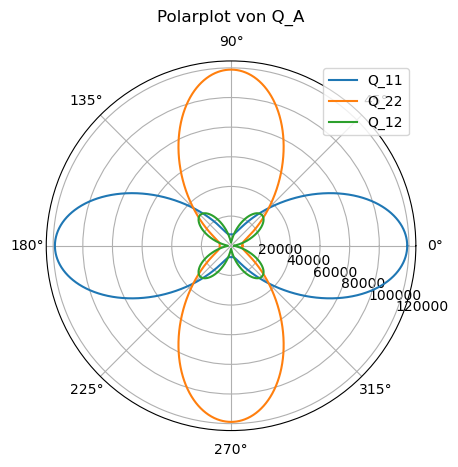

In [5]:
theta_liste_grad = np.arange(0, 360, 0.1)
theta_liste_rad = theta_liste_grad /180 * np.pi

Q_11 = []
for val in theta_liste_grad:
    Q_11.append(Q_transform(Q_A, val)[0][0])
Q_22 = []
for val in theta_liste_grad:
    Q_22.append(Q_transform(Q_A, val)[1][1])
Q_12 = []
for val in theta_liste_grad:
    Q_12.append(Q_transform(Q_A, val)[0][1])

fig, ax = plt.subplots(subplot_kw={'projection': 'polar'})
ax.plot(theta_liste_rad, Q_11, label='Q_11')
ax.plot(theta_liste_rad, Q_22, label='Q_22')
ax.plot(theta_liste_rad, Q_12, label='Q_12')
ax.legend()
ax.set_rlabel_position(-22.5)
ax.grid(True)

ax.set_title("Polarplot von Q_A", va='bottom')
plt.show()

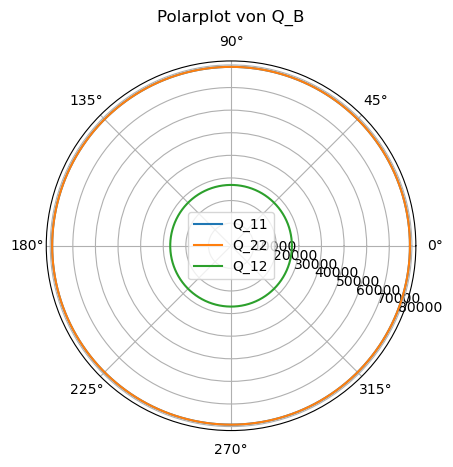

In [6]:
Q_11 = []
for val in theta_liste_grad:
    Q_11.append(Q_transform(Q_B, val)[0][0])
Q_22 = []
for val in theta_liste_grad:
    Q_22.append(Q_transform(Q_B, val)[1][1])
Q_12 = []
for val in theta_liste_grad:
    Q_12.append(Q_transform(Q_B, val)[0][1])

fig, ax = plt.subplots(subplot_kw={'projection': 'polar'})
ax.plot(theta_liste_rad, Q_11, label='Q_11')
ax.plot(theta_liste_rad, Q_22, label='Q_22')
ax.plot(theta_liste_rad, Q_12, label='Q_12')
ax.legend()
ax.set_rlabel_position(-22.5)
ax.grid(True)

ax.set_title("Polarplot von Q_B", va='bottom')
plt.show()

### Aufgabe 10.3

Gegeben sei die $Q$\-Matrix für eine UD\-Einzelschicht aus E\-Glasfasern und Epoxidharz. 

Gegeben sei ein UD\-Laminataufbau aus vier Schichten.

Definieren Sie die folgenden Layups analog. Dabei sollen die Schichten immer aus 0,2 mm mit der gegebenen Q\-Matrix für GFK bestehen.

- L2: \[45 / \-45\]
- L3: \[45 / \-45\]s
- L4: \[0 / 90 / 45 / \-45\]s



In [7]:
Q_GFK_UD = np.array([[32101., 2689., 0.],
                   [2689., 9022., 0.],
                   [0., 0. , 3282.]])

In [8]:
layup_1 = [{'Q':Q_GFK_UD,'t':0.2,'theta':0},
          {'Q':Q_GFK_UD,'t':0.2,'theta':0},
          {'Q':Q_GFK_UD,'t':0.2,'theta':0},
          {'Q':Q_GFK_UD,'t':0.2,'theta':0},]

layup_2 = [{'Q':Q_GFK_UD,'t':0.2,'theta':45},
          {'Q':Q_GFK_UD,'t':0.2,'theta':-45},]

layup_3 = [{'Q':Q_GFK_UD,'t':0.2,'theta':45},
          {'Q':Q_GFK_UD,'t':0.2,'theta':-45},
          {'Q':Q_GFK_UD,'t':0.2,'theta':-45},
          {'Q':Q_GFK_UD,'t':0.2,'theta':45},]

layup_4 = [{'Q':Q_GFK_UD,'t':0.2,'theta':0},
          {'Q':Q_GFK_UD,'t':0.2,'theta':90},
          {'Q':Q_GFK_UD,'t':0.2,'theta':45},
          {'Q':Q_GFK_UD,'t':0.2,'theta':-45},
          {'Q':Q_GFK_UD,'t':0.2,'theta':-45},
          {'Q':Q_GFK_UD,'t':0.2,'theta':45},
          {'Q':Q_GFK_UD,'t':0.2,'theta':90},
          {'Q':Q_GFK_UD,'t':0.2,'theta':0},]

### Aufgabe 10.4

Schauen Sie sich die folgende Klassendefinition für Laminatobjekte an. Ergänzen Sie die Berechnungen der ABD\- sowie der invertierten ABD\-Matrix.

Ergänzen Sie eine klasseninterne Funktion "add_lamina(Q, t, theta)" mit der sich dem Layup eine weitere Schicht hinzufügen lässt.

<u>Hinweise:</u> 

$A_{ij} = \sum_{k_=1}^{N} (\bar{Q}_{ij})_k (z_k - z_{k-1})$

$B_{ij} = \frac12 \sum_{k_=1}^{N} (\bar{Q}_{ij})_k (z_k^2 - z_{k-1}^2)$

$D_{ij} = \frac13 \sum_{k_=1}^{N} (\bar{Q}_{ij})_k (z_k^3 - z_{k-1}^3)$

In [9]:
# Musterlösung:

class laminate:

    # Initiierung eines laminate-Objektes

    def __init__(self, layup):
        self.layup = layup
        self.ABD = np.zeros((6,6))
        self.ABD_inv = np.zeros((6,6))
        self.t = 0.

    # Methode zum Berechnen der Laminatdicke

    def calc_t(self):
        self.t = 0
        for n in range(len(self.layup)):
            self.t = self.t + self.layup[n]['t']

    # Methode zum Berechnen der ABD-Matrix des Laminates

    def calc_ABD(self):
        A = np.zeros((3,3))
        B = np.zeros((3,3))
        D = np.zeros((3,3))
        self.calc_t()
        z_u = -self.t/2 # untere z-Koordinate der untersten Lage
        
        for k in range(len(self.layup)):
            Q_bar = Q_transform(self.layup[k]['Q'],self.layup[k]['theta'])
            
            z_o = z_u+self.layup[k]['t']

            A_k = Q_bar*(z_o-z_u)
            A = A+A_k

            B_k = 1/2*Q_bar*(z_o**2-z_u**2)
            B = B+B_k

            D_k = 1/3*Q_bar*(z_o**3-z_u**3)
            D = D+D_k
            
            z_u = z_o # vorbereitend für nächste Lage wird aktuell obere z-Koordinate als neue untere festgelegt

        AB = np.append(A, B, axis=0) #führt Matrizen vertikal zusammen
        BD = np.append(B, D, axis=0) #führt Matrizen vertikal zusammen
        ABD = np.append(AB, BD, axis=1) #führt Matrizen horizontal zusammen
        self.ABD = ABD
        self.ABD_inv = np.linalg.inv(self.ABD)

    def add_lamina(Q, t, theta=0):
        self.layup = self.layup + [{'Q':Q, 't':t, 'theta': theta}]


### Aufgabe 10.5

Instanzieren Sie vier Laminate mit den gegebenen UD\-Aufbauten

Berechnen Sie und geben Sie jeweils die ABD\-Matrix der Laminate aus. Diskutieren Sie diese.

In [10]:
# Musterlösung

lam_1 = laminate(layup_1)
lam_1.calc_ABD()
print(f'Laminat 1 :\n{np.around(lam_1.ABD, decimals=2)}')

lam_2 = laminate(layup_2)
lam_2.calc_ABD()
print(f'Laminat 2 :\n{np.around(lam_2.ABD, decimals=2)}')

lam_3 = laminate(layup_3)
lam_3.calc_ABD()
print(f'Laminat 3 :\n{np.around(lam_3.ABD, decimals=2)}')

lam_4 = laminate(layup_4)
lam_4.calc_ABD()
print(f'Laminat 4 :\n{np.around(lam_4.ABD, decimals=2)}')

Laminat 1 :
[[25680.8   2151.2      0.       0.       0.       0.  ]
 [ 2151.2   7217.6      0.       0.       0.       0.  ]
 [    0.       0.    2625.6      0.       0.       0.  ]
 [    0.       0.       0.    1369.64   114.73     0.  ]
 [    0.       0.       0.     114.73   384.94     0.  ]
 [    0.       0.       0.       0.       0.     140.03]]
Laminat 2 :
[[5962.9  3337.3     0.      0.      0.   -230.79]
 [3337.3  5962.9     0.      0.      0.   -230.79]
 [   0.      0.   3574.5  -230.79 -230.79    0.  ]
 [   0.      0.   -230.79   79.51   44.5     0.  ]
 [   0.      0.   -230.79   44.5    79.51    0.  ]
 [-230.79 -230.79    0.      0.      0.     47.66]]
Laminat 3 :
[[11925.8   6674.6      0.       0.      -0.       0.  ]
 [ 6674.6  11925.8      0.      -0.      -0.       0.  ]
 [    0.       0.    7149.       0.       0.       0.  ]
 [    0.      -0.       0.     636.04   355.98   184.63]
 [   -0.      -0.       0.     355.98   636.04   184.63]
 [    0.       0.       0.   